<a href="https://colab.research.google.com/github/Maitri601/DataAnalytics/blob/main/UdemyMidCourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

In [41]:
import pandas as pd

transactions = pd.read_csv("project_transactions.csv",
                           dtype={"DAY":"Int16",
                                  "QUANTITY":"Int32",
                                  "STORE_ID":"Int32",
                                  "WEEK_NO":"Int8"},
                        )


In [42]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [43]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [44]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [45]:
#check missing value counts
transactions.isna().sum()
transactions.dropna(inplace=True)

In [46]:
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [47]:
transactions['household_key'].nunique()

2099

In [48]:
transactions['PRODUCT_ID'].nunique()

84138

In [51]:
# create a discount sum column and a percentage discount column
# transactions = (
#     transactions
#     .assign(total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"],
#             percentage_discount = (lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs()))
#     .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1))


# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"] < 1, 1.0)
                                       .where(transactions["percentage_discount"] > 0, 0)
                                      )

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [52]:
transactions['SALES_VALUE'].sum()

6666243.499999999

In [55]:
transactions['total_discount'].sum()

-1178658.0799999998

In [56]:
transactions['total_discount'].sum()/transactions['SALES_VALUE'].sum()

-0.1768099350106248

In [57]:
transactions['percentage_discount'].mean()

0.2073244407398103

In [58]:
transactions['QUANTITY'].sum()

216713611

In [59]:
transactions['QUANTITY'].max()

89638

In [60]:
transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              34749153595.0
DAY                            503.0
PRODUCT_ID                 6534178.0
QUANTITY                     89638.0
SALES_VALUE                    250.0
STORE_ID                       384.0
WEEK_NO                         73.0
total_discount                -13.45
percentage_discount           0.0538
Name: 1442095, dtype: Float64

In [61]:
transactions['SALES_VALUE'].sum() / transactions['BASKET_ID'].nunique()

28.61797938516092

In [62]:
transactions['SALES_VALUE'].sum() / transactions['household_key'].nunique()

3175.9140066698424

Plot the distribution of total sales value purchased at the household level
what were the top 10 households by quantity purchased ?
what were the top 10 households by sales vale?
Plot the total sales value for our top 10 households by value, ordered from highesr to lowest.

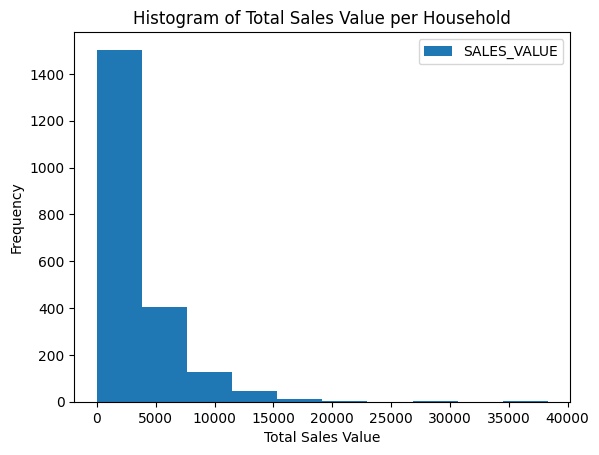

In [67]:
import matplotlib.pyplot as plt

(transactions
 .groupby("household_key")
 .agg({"SALES_VALUE":"sum"})
 .plot.hist()
)
plt.xlabel("Total Sales Value")
plt.ylabel("Frequency")
plt.title("Histogram of Total Sales Value per Household")
plt.show()


In [70]:
top10_value = (
    transactions
    .groupby("household_key")
    .agg({"SALES_VALUE":sum})
    .sort_values("SALES_VALUE",ascending=False)
    .iloc[:10]
)

top10_quant = (
    transactions
    .groupby("household_key")
    .agg({"QUANTITY":sum})
    .sort_values("QUANTITY",ascending=False)
    .iloc[:10]
)

In [71]:
top10_quant

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [72]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [75]:
(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum','QUANTITY': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .loc[:, "SALES_VALUE"]
 .describe()
)

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

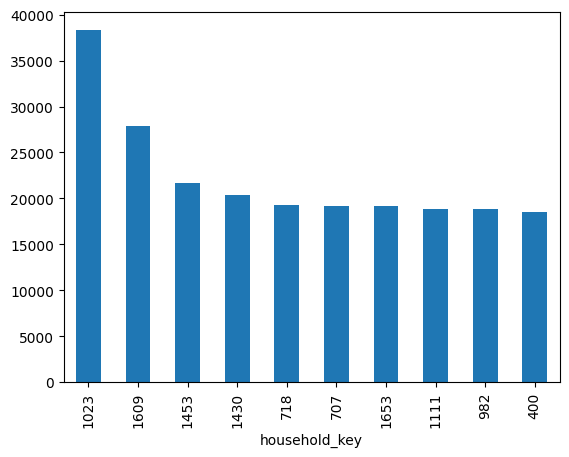

In [77]:
# top 10 households by sales value plotted with a bar plot

top10_value["SALES_VALUE"].plot.bar();

In [78]:
top10_products = (transactions
                 .groupby(["PRODUCT_ID"])
                 .agg({"SALES_VALUE": "sum"})
                 .sort_values("SALES_VALUE", ascending=False)
                 .iloc[:10]
)

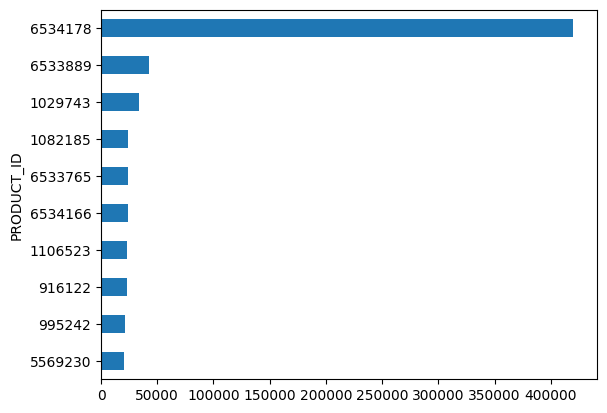

In [80]:
top10_products["SALES_VALUE"].sort_values().plot.barh();

In [81]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"total_discount"]
 .sum())
/(transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"SALES_VALUE"]
  .sum())
)

-0.10331267387397927

In [82]:
products = pd.read_csv("product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [83]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers

top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index
                  )

top_hh_products

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [84]:
products.query("PRODUCT_ID in @top_hh_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [85]:
products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [86]:
products.query("PRODUCT_ID in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
